<a href="https://colab.research.google.com/github/PranjalMinocha/JPLasteroid/blob/main/shriji_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
# importing dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split


In [110]:
#import csv file
asteroid_data=pd.read_csv('/content/Asteroid_Updated.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [111]:
#getting insight about the columns
column_headers =asteroid_data.keys().values.tolist()
print("The Column Header :", column_headers)

The Column Header : ['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent', 'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G', 'moid', 'class', 'n', 'per', 'ma']


In [112]:
#getting descriptionof columns
asteroid_data.describe()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,...,rot_per,GM,BV,UB,IR,G,moid,n,per,ma
count,839712.000000,839714.000000,839714.000000,839714.000000,839714.000000,839714.000000,839708.000000,839713.000000,824240.000000,839714.000000,...,18796.000000,1.400000e+01,1021.000000,979.000000,1.00,119.000000,8.232720e+05,8.397120e+05,8.397080e+05,839706.000000
mean,2.757514,0.155636,8.949826,168.499466,181.075796,2.404728,3.385710,6.859734,5688.422331,259.191837,...,21.136772,7.821928e+00,0.769212,0.364396,-0.33,0.178739,1.423371e+00,2.374145e-01,2.505533e+03,180.659892
std,114.384959,0.093897,6.666087,103.096307,104.023854,2.233172,12.748733,252.264249,4208.177231,371.759667,...,73.131751,1.678880e+01,0.088625,0.095780,NaN,0.134603,2.250450e+00,8.095014e-02,9.213979e+04,106.562235
min,-104279.220927,0.000000,0.007546,0.000388,0.001666,0.070511,0.773684,0.000000,0.000000,2.000000,...,0.004389,2.100000e-09,0.580000,0.120000,-0.33,-0.250000,3.437640e-07,2.926897e-08,1.511339e+02,-67.136826
25%,2.385258,0.091454,4.069077,80.211400,91.041603,1.971941,2.775350,3.683928,3608.000000,50.000000,...,4.210000,1.022225e-03,0.700000,0.289000,-0.33,0.100000,9.784998e-01,1.900553e-01,1.345555e+03,86.642618
50%,2.644219,0.143655,7.257101,160.294860,181.669478,2.225510,3.037761,4.299859,5806.000000,118.000000,...,6.653000,6.192500e-01,0.743000,0.360000,-0.33,0.190000,1.237810e+00,2.292228e-01,1.570524e+03,181.517775
75%,2.996048,0.199400,12.255653,252.201519,271.521717,2.578162,3.357967,5.185985,7270.000000,296.000000,...,12.624250,6.500000e+00,0.850000,0.439000,-0.33,0.250000,1.590560e+00,2.675475e-01,1.894184e+03,274.301731
max,3043.149073,1.201134,175.188725,359.999800,359.999833,80.424175,6081.841956,167877.712688,72684.000000,9325.000000,...,3240.000000,6.262840e+01,1.077000,0.655000,-0.33,0.600000,7.950130e+01,2.381994e+00,6.131733e+07,491.618014


In [25]:
# viewing first 5 rows of dataset
asteroid_data.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,...,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,...,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,...,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,...,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,...,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,...,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [26]:
# info about dataset
asteroid_data.info

<bound method DataFrame.info of            name         a         e          i          om           w  \
0         Ceres  2.769165  0.076009  10.594067   80.305532   73.597694   
1        Pallas  2.772466  0.230337  34.836234  173.080063  310.048857   
2          Juno  2.669150  0.256942  12.988919  169.852760  248.138626   
3         Vesta  2.361418  0.088721   7.141771  103.810804  150.728541   
4       Astraea  2.574249  0.191095   5.366988  141.576605  358.687607   
...         ...       ...       ...        ...         ...         ...   
839709      NaN  2.812945  0.664688   4.695700  183.310012  234.618352   
839710      NaN  2.645238  0.259376  12.574937    1.620020  339.568072   
839711      NaN  2.373137  0.202053   0.732484  176.499082  198.026527   
839712      NaN  2.260404  0.258348   9.661947  204.512448  148.496988   
839713      NaN  2.546442  0.287672   5.356238   70.709555  273.483265   

               q        ad     per_y  data_arc  ...     UB  IR  spec_B spec_T  

In [27]:
# getting number of missing value for each feature
asteroid_data.isnull().sum()

name              817747
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
extent            839696
albedo            703305
rot_per           820918
GM                839700
BV                838693
UB                838735
IR                839713
spec_B            838048
spec_T            838734
G                 839595
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64

In [28]:
# filling ' ' in csv with nan
import numpy as np

asteroid_data['name'] = asteroid_data['name'].replace(' ', np.nan)
#df = df.dropna(axis=0, subset=['Charge_Per_Line'])

In [29]:
asteroid_data['condition_code'] = asteroid_data['condition_code'].replace(' ', np.nan)
asteroid_data['diameter'] = asteroid_data['diameter'].replace(' ', np.nan)
asteroid_data['extent'] = asteroid_data['extent'].replace(' ', np.nan)
asteroid_data['albedo'] = asteroid_data['albedo'].replace(' ', np.nan)
asteroid_data['rot_per'] = asteroid_data['rot_per'].replace(' ', np.nan)
asteroid_data['GM'] = asteroid_data['GM'].replace(' ', np.nan)
asteroid_data['BV'] = asteroid_data['BV'].replace(' ', np.nan)
asteroid_data['UB'] = asteroid_data['UB'].replace(' ', np.nan)
asteroid_data['IR'] = asteroid_data['IR'].replace(' ', np.nan)
asteroid_data['spec_B'] = asteroid_data['spec_B'].replace(' ', np.nan)
asteroid_data['spec_T'] = asteroid_data['spec_T'].replace(' ', np.nan)
asteroid_data['G'] = asteroid_data['G'].replace(' ', np.nan)
asteroid_data['ma'] = asteroid_data['ma'].replace(' ', np.nan)

In [30]:
asteroid_data.isnull().sum()

name              817747
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
extent            839696
albedo            703305
rot_per           820918
GM                839700
BV                838693
UB                838735
IR                839713
spec_B            838048
spec_T            838734
G                 839595
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64

In [31]:
# droping those columns having around or more than 80% missing data
asteroid_data.drop(asteroid_data[['name', 'extent','rot_per','GM','BV','UB','IR','spec_B','spec_T','G']], axis=1,inplace=True)

In [32]:
# rechecking number of null values
asteroid_data.isnull().sum()

a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
albedo            703305
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64

In [33]:
# viewing last 5 rows for better idea
asteroid_data.tail()

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,...,H,neo,pha,diameter,albedo,moid,class,n,per,ma
839709,2.812945,0.664688,4.695700,183.310012,234.618352,0.943214,4.682676,4.717914,17298.0,0,...,20.400,Y,Y,NaN,NaN,0.032397,APO,0.208911,1723.217927,156.905910
839710,2.645238,0.259376,12.574937,1.620020,339.568072,1.959126,3.331350,4.302346,16.0,9,...,17.507,N,N,NaN,NaN,0.956145,MBA,0.229090,1571.431965,13.366251
839711,2.373137,0.202053,0.732484,176.499082,198.026527,1.893638,2.852636,3.655884,5.0,9,...,18.071,N,N,NaN,NaN,0.893896,MBA,0.269600,1335.311579,355.351127
839712,2.260404,0.258348,9.661947,204.512448,148.496988,1.676433,2.844376,3.398501,10.0,9,...,18.060,N,N,NaN,NaN,0.680220,MBA,0.290018,1241.302609,15.320134
839713,2.546442,0.287672,5.356238,70.709555,273.483265,1.813901,3.278983,4.063580,11.0,9,...,17.406,N,N,NaN,NaN,0.815280,MBA,0.242551,1484.222588,20.432959


In [17]:
# getting number of null and non null values of diameter column
print(asteroid_data.diameter.isnull().sum())
print(asteroid_data.diameter.notnull().sum())

702078
137636


In [34]:
# dropping those rows from dataset whose diameter column values are missing
asteroid_data.dropna( subset=['diameter'],inplace=True)

In [35]:
#dropping those rows from dataset whose albedo column values are missing
asteroid_data.dropna( subset=['albedo'],inplace=True)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


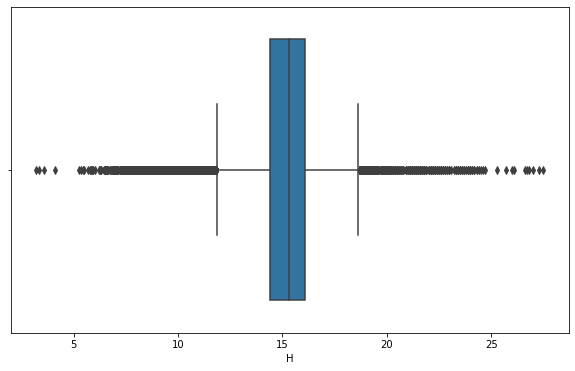

In [45]:
#plotting boxplot to get an idea about skewness of data and whether to impute the missing data 
#of H column with mean, median or mode
fig,ax=plt.subplots(figsize=(10,6))
sns.boxplot(asteroid_data.H)

In [39]:
# getting H column's  mode
asteroid_data['H'].mode()

0    15.2
dtype: float64

In [40]:
#imputing missing data of H column with mode
asteroid_data['H'].fillna(asteroid_data['H'].mode()[0], inplace= True)

In [41]:
asteroid_data.isnull().sum()

a                   0
e                   0
i                   0
om                  0
w                   0
q                   0
ad                  0
per_y               0
data_arc          129
condition_code      0
n_obs_used          0
H                   0
neo                 0
pha                 0
diameter            0
albedo              0
moid                0
class               0
n                   0
per                 0
ma                  0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


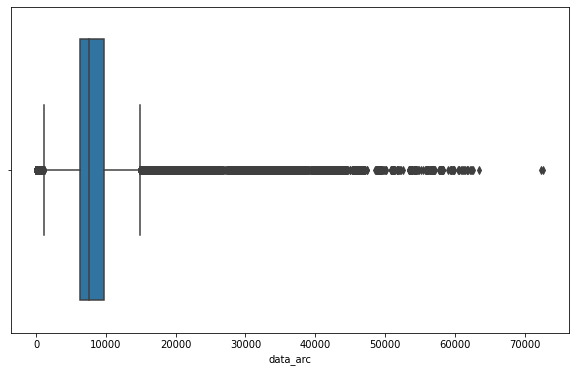

In [42]:
##plotting boxplot to get an idea about skewness of data and whether to impute the missing data 
#of data_arc column with mean, median or mode
fig,ax=plt.subplots(figsize=(10,6))
sns.boxplot(asteroid_data.data_arc)

In [43]:
# imputing missing values of data_arc with median
asteroid_data['data_arc'].fillna(asteroid_data['data_arc'].median(), inplace=True)

In [44]:
# reviewing the number of missing values
asteroid_data.isnull().sum()

a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
H                 0
neo               0
pha               0
diameter          0
albedo            0
moid              0
class             0
n                 0
per               0
ma                0
dtype: int64

In [38]:
#getting thefinal shape ofdataset after dropping rows and columns and imputations
asteroid_data.shape

(136406, 21)

In [46]:
#getting correlation od whole data
correlation= asteroid_data.corr()

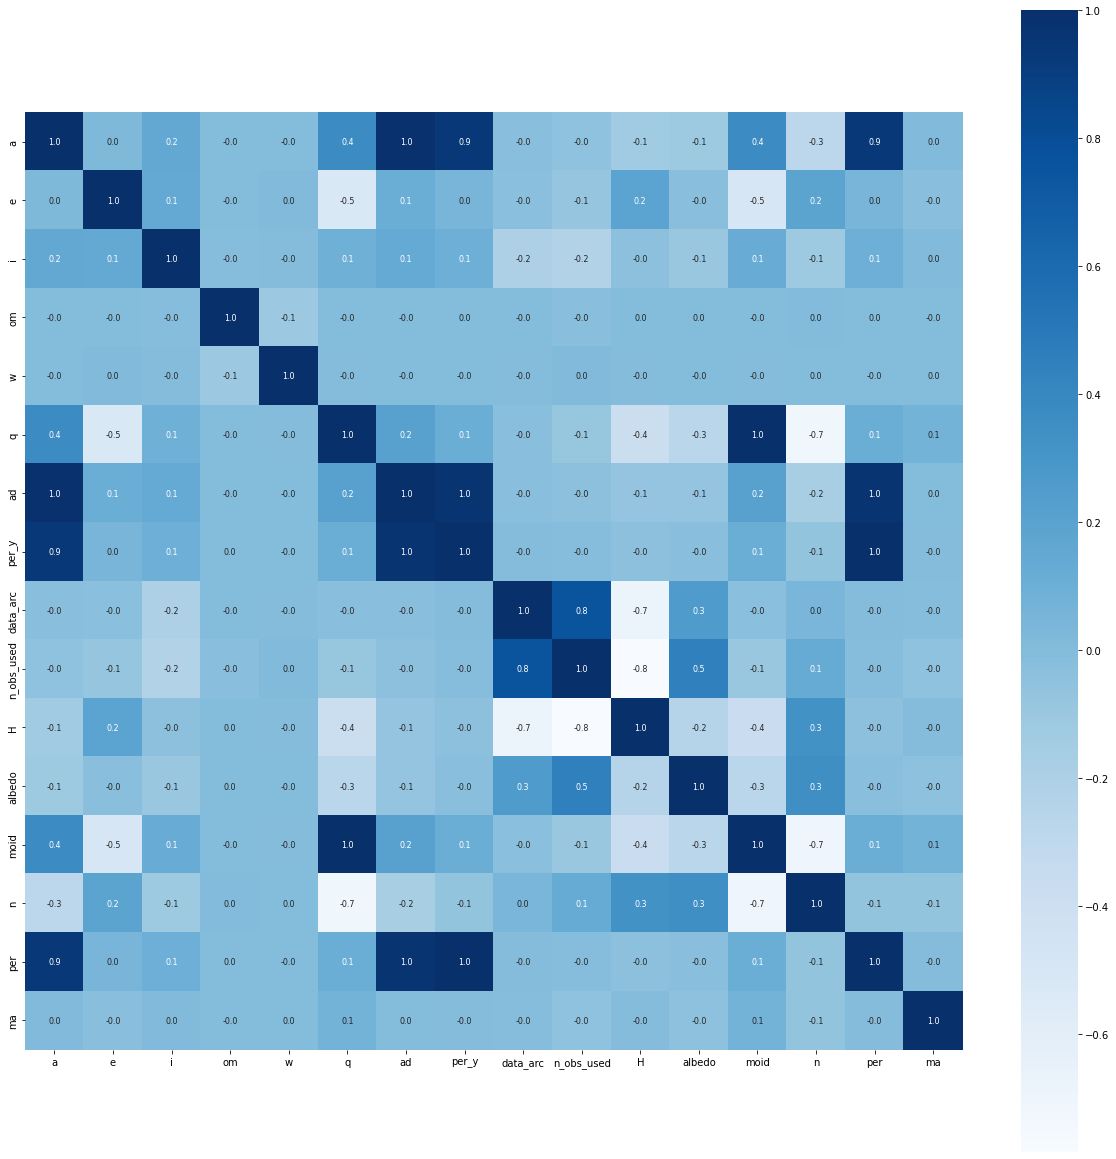

In [47]:
# getting heatmap/correlation matrix
plt.figure(figsize=(21,21))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True,  annot_kws={'size':8}, cmap='Blues')


In [68]:
# making non null non numeric data of diameter numeric
asteroid_data = asteroid_data[pd.to_numeric(asteroid_data['diameter'], errors='coerce').notnull()] 

In [69]:
#getting value ount for near earth object column
print(asteroid_data.neo.value_counts())

N    135604
Y       801
Name: neo, dtype: int64


In [92]:
# label encoding
asteroid_data.replace({"neo":{'N':0,'Y':1}}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [70]:
#getting value count for pha column
print(asteroid_data.pha.value_counts())

N    136207
Y       198
Name: pha, dtype: int64


In [93]:
# label encoding
asteroid_data.replace({"pha":{'N':0,'Y':1}}, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [71]:
#getting value count for class column
asteroid_data['class'].value_counts()

MBA    125305
OMB      7434
TJN      1874
IMB       571
APO       454
MCA       351
AMO       256
ATE        91
CEN        49
TNO        13
AST         7
Name: class, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


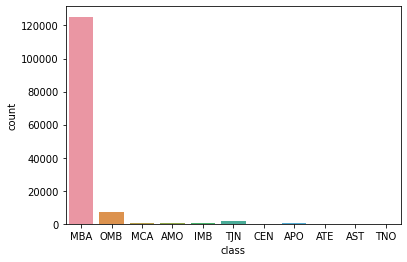

In [51]:
#getting countplot for class column
sns.countplot('class', data= asteroid_data)

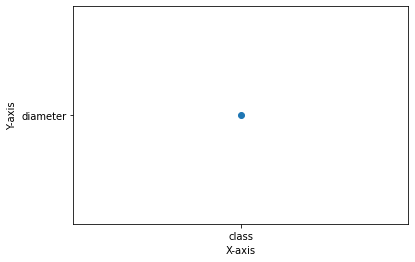

In [80]:
plt.scatter(x='class',y='diameter')
 
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.show()

In [94]:
# getting first 20 rows to inspect dataset after above changes
asteroid_data.head(20)

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,...,H,neo,pha,diameter,albedo,moid,class,n,per,ma
0,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,...,3.34,0,0,939.400,0.0900,1.594780,MBA,0.213885,1683.145708,77.372096
1,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,...,4.13,0,0,545.000,0.1010,1.233240,MBA,0.213503,1686.155999,59.699133
2,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,...,5.33,0,0,246.596,0.2140,1.034540,MBA,0.226019,1592.787285,34.925016
3,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,...,3.20,0,0,525.400,0.4228,1.139480,MBA,0.271609,1325.432765,95.861936
4,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,...,6.85,0,0,106.699,0.2740,1.095890,MBA,0.238632,1508.600458,282.366289
5,2.425160,0.203007,14.737901,138.640203,239.807490,1.932835,2.917485,3.776755,62329.0,0,...,5.71,0,0,185.180,0.2679,0.973965,MBA,0.260972,1379.459705,86.197923
6,2.385334,0.231206,5.523651,259.563231,145.265106,1.833831,2.936837,3.684105,62452.0,0,...,5.51,0,0,199.830,0.2766,0.846100,MBA,0.267535,1345.619196,140.419656
7,2.201764,0.156499,5.886955,110.889330,285.287462,1.857190,2.546339,3.267115,62655.0,0,...,6.49,0,0,147.491,0.2260,0.874176,MBA,0.301681,1193.313717,194.882895
8,2.385637,0.123114,5.576816,68.908577,6.417369,2.091931,2.679342,3.684806,61821.0,0,...,6.28,0,0,190.000,0.1180,1.106910,MBA,0.267484,1345.875362,276.861623
9,3.141539,0.112461,3.831560,283.202167,312.315206,2.788240,3.494839,5.568291,62175.0,0,...,5.43,0,0,407.120,0.0717,1.778390,MBA,0.177007,2033.818284,152.184851


In [77]:
# converting diameter values to numeric format so that boxplot can be plotted
asteroid_data['diameter'] = pd.to_numeric(asteroid_data['diameter'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


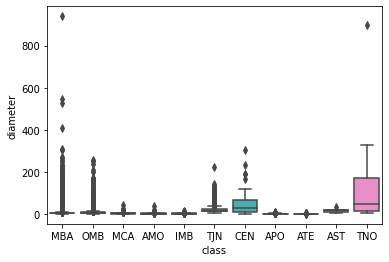

In [89]:
# plotting box plot between diameter and class column
sns.boxplot(x='class', y='diameter', data=asteroid_data)

In [79]:
#getting description of diameter in accordance with each class
group_by_class = asteroid_data.groupby('class').agg({
    'diameter':['mean','median','min','max','std','var','count']})
print(group_by_class)

         diameter                                                           
             mean   median    min      max         std           var   count
class                                                                       
AMO      1.781633   1.0460  0.088   37.675    3.034431      9.207771     256
APO      0.950238   0.6005  0.008    8.480    1.065632      1.135571     454
AST     14.283429  16.4000  2.656   32.492   10.028549    100.571796       7
ATE      0.622242   0.3700  0.023    3.879    0.708146      0.501471      91
CEN     52.473245  28.0000  0.890  302.000   63.978581   4093.258785      49
IMB      2.302081   1.7510  0.742   11.506    1.487166      2.211662     571
MBA      5.091917   3.8470  0.716  939.400    8.284154     68.627201  125305
MCA      3.429037   2.5740  0.587   42.870    3.528720     12.451864     351
OMB      8.831346   6.3880  0.347  254.000   12.074683    145.797958    7434
TJN     20.771467  15.4710  4.562  225.000   16.487683    271.843695    1874

In [95]:
# getting correlation tabeof each feaature with each other
asteroid_data.corr()

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,neo,pha,diameter,albedo,moid,n,per,ma
a,1.000000,0.022056,0.150224,-0.000591,-0.002459,0.366078,0.986255,0.941626,-0.020429,-0.049958,-0.132684,-0.051207,-0.030190,0.144826,-0.110212,0.369326,-0.280137,0.941626,0.014045
e,0.022056,1.000000,0.146051,-0.000944,0.012588,-0.513702,0.114397,0.048748,-0.030253,-0.078507,0.196815,0.337899,0.165554,-0.049024,-0.019427,-0.490027,0.187442,0.048748,-0.018018
i,0.150224,0.146051,1.000000,-0.013248,-0.004747,0.088147,0.142273,0.097153,-0.195020,-0.221062,-0.035862,0.101063,0.026370,0.054861,-0.089796,0.127121,-0.113763,0.097153,0.014299
om,-0.000591,-0.000944,-0.013248,1.000000,-0.107442,-0.002667,-0.000147,0.000381,-0.000483,-0.023706,0.002971,0.003674,0.000720,0.001141,0.000742,-0.003460,0.007654,0.000381,-0.003370
w,-0.002459,0.012588,-0.004747,-0.107442,1.000000,-0.006872,-0.001365,-0.001636,-0.005177,0.010672,-0.008781,0.001230,-0.002972,0.003038,-0.003040,-0.006743,0.002903,-0.001636,0.001523
q,0.366078,-0.513702,0.088147,-0.002667,-0.006872,1.000000,0.207286,0.109456,-0.018978,-0.081666,-0.374707,-0.229646,-0.121156,0.330763,-0.262703,0.996888,-0.709394,0.109456,0.070814
ad,0.986255,0.114397,0.142273,-0.000147,-0.001365,0.207286,1.000000,0.970454,-0.018106,-0.038018,-0.072953,-0.013057,-0.010225,0.093520,-0.069216,0.211253,-0.168539,0.970454,0.002192
per_y,0.941626,0.048748,0.097153,0.000381,-0.001636,0.109456,0.970454,1.000000,-0.008015,-0.011173,-0.035621,-0.007085,-0.004085,0.049021,-0.019492,0.111007,-0.060335,1.000000,-0.005352
data_arc,-0.020429,-0.030253,-0.195020,-0.000483,-0.005177,-0.018978,-0.018106,-0.008015,1.000000,0.754424,-0.674381,-0.030789,-0.011682,0.492883,0.255993,-0.026581,0.043293,-0.008015,-0.017180
n_obs_used,-0.049958,-0.078507,-0.221062,-0.023706,0.010672,-0.081666,-0.038018,-0.011173,0.754424,1.000000,-0.784803,-0.021922,-0.007654,0.385755,0.450594,-0.091267,0.130410,-0.011173,-0.046997


In [96]:
# getting correlation values of each feature with target feature ie diameter
asteroid_data.corrwith(asteroid_data["diameter"])

a             0.144826
e            -0.049024
i             0.054861
om            0.001141
w             0.003038
q             0.330763
ad            0.093520
per_y         0.049021
data_arc      0.492883
n_obs_used    0.385755
H            -0.569552
neo          -0.035349
pha          -0.018858
diameter      1.000000
albedo       -0.107598
moid          0.333490
n            -0.203187
per           0.049021
ma            0.009542
dtype: float64

In [87]:
#encoder = OrdinalEncoder()

#asteroid_data['class']=asteroid_data[['class']].reshape(-1,1)
#result = encoder.fit_transform(asteroid_data[['class']])
#print(result)

[[6.]
 [6.]
 [6.]
 ...
 [6.]
 [6.]
 [6.]]


In [97]:
#for class column with more than two categories applying ordinal encoder
#to encode classes subsets
from sklearn.preprocessing import OrdinalEncoder

ord_enc = OrdinalEncoder()
asteroid_data["class_code"] = ord_enc.fit_transform(asteroid_data[["class"]])
asteroid_data[["class", "class_code"]].tail(100)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,class,class_code
789842,MBA,6.0
789908,MBA,6.0
789924,MBA,6.0
790025,MBA,6.0
790137,MBA,6.0
...,...,...
797835,MBA,6.0
797860,MBA,6.0
798077,MBA,6.0
799752,MBA,6.0


In [98]:
#getting nmber of encoding classes code
asteroid_data['class_code'].value_counts()

6.0     125305
8.0       7434
9.0       1874
5.0        571
1.0        454
7.0        351
0.0        256
3.0         91
4.0         49
10.0        13
2.0          7
Name: class_code, dtype: int64

In [99]:
#number of categories of classes just to compare with above class code
asteroid_data['class'].value_counts()

MBA    125305
OMB      7434
TJN      1874
IMB       571
APO       454
MCA       351
AMO       256
ATE        91
CEN        49
TNO        13
AST         7
Name: class, dtype: int64

In [100]:
#again getting correlation of diameter with all features
asteroid_data.corrwith(asteroid_data["diameter"])

a             0.144826
e            -0.049024
i             0.054861
om            0.001141
w             0.003038
q             0.330763
ad            0.093520
per_y         0.049021
data_arc      0.492883
n_obs_used    0.385755
H            -0.569552
neo          -0.035349
pha          -0.018858
diameter      1.000000
albedo       -0.107598
moid          0.333490
n            -0.203187
per           0.049021
ma            0.009542
class_code    0.173490
dtype: float64

In [101]:
#dropping those features having negative correlation with diameter column
asteroid_data.drop(asteroid_data[['e', 'H','neo','pha','albedo','n']], axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [104]:
#dropping those features having very negligiablecorrelation with diameter correlation with diameter column
asteroid_data.drop(asteroid_data[['om', 'w','ma']], axis=1,inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [105]:
#getting final dataset shape
asteroid_data.shape

(136405, 13)

In [107]:
#getting final description of dataset
asteroid_data.describe()

,a,i,q,ad,per_y,data_arc,n_obs_used,diameter,moid,per,class_code
count,136405.000000,136405.000000,136405.000000,136405.000000,136405.000000,136405.000000,136405.000000,136405.000000,136405.000000,1.364050e+05,136405.000000
mean,2.815398,10.306329,2.403403,3.227394,4.887253,9018.905517,680.173894,5.503682,1.420767,1.785069e+03,6.118155
std,1.528988,6.810126,0.516488,2.908883,25.647298,6156.949051,595.551947,9.403474,0.512746,9.367676e+03,0.703566
min,0.626226,0.021855,0.081882,0.999956,0.495569,1.000000,5.000000,0.008000,0.000166,1.810067e+02,0.000000
25%,2.537308,5.095662,2.069256,2.865165,4.041737,6314.000000,220.000000,2.780000,1.082770,1.476244e+03,6.000000
50%,2.750811,9.350615,2.364035,3.167360,4.562463,7591.000000,503.000000,3.970000,1.384900,1.666440e+03,6.000000
75%,3.092435,13.688277,2.685936,3.467921,5.438249,9765.000000,990.000000,5.764000,1.699600,1.986321e+03,6.000000
max,389.145964,170.323647,40.465671,772.201080,7676.742943,72684.000000,9325.000000,939.400000,39.507000,2.803930e+06,10.000000
